In [1]:
import pandas as pd
import numpy as np
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score
from sklearn import model_selection
from sklearn.base import TransformerMixin
from sklearn.model_selection import KFold
import matplotlib.pylab as plt
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
from numpy import interp
from joblib import dump
import os
import joblib

__Data Preprocessing__

In [2]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


def preprocess(df):
    df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']] = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].replace('unknown', np.NaN)
    bank_object_data = df.select_dtypes(include="object")
    bank_non_object_data = df.select_dtypes(exclude="object")
    bank_object_data = DataFrameImputer().fit_transform(bank_object_data)
    label = LabelEncoder()
    bank_object_data = bank_object_data.apply(label.fit_transform)
    bank_final = pd.concat([bank_object_data, bank_non_object_data], axis = 1)
    return(bank_final)

In [3]:
df = pd.read_csv('bank-data/bank-additional-full.csv')
bank_final = preprocess(df)

__Decision Tree__:
_with impution and shuffle_

__Precision, Recall, f1, Accuracy__

In [6]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()


X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)
scoring = ['accuracy', 'recall', 'precision', 'f1']

kfold = KFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_validate(model, X, Y, scoring=scoring, cv=kfold)
print("Recall: %0.2f (+/- %0.2f)" % (results_kfold['test_recall'].mean(), results_kfold['test_recall'].std()))
print("Precision: %0.2f (+/- %0.2f)" % (results_kfold['test_precision'].mean(), results_kfold['test_precision'].std()))
print("F1 Score: %0.2f (+/- %0.2f)" % (results_kfold['test_f1'].mean(), results_kfold['test_f1'].std()))
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold['test_accuracy'].mean(), results_kfold['test_accuracy'].std()))

stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

Recall: 0.52 (+/- 0.03)
Precision: 0.51 (+/- 0.02)
F1 Score: 0.51 (+/- 0.02)
Accuracy: 0.89 (+/- 0.00)
Start Time:  2020-04-22 07:48:33.947046 Stop Time:  2020-04-22 07:48:35.926510 Time Taken:  1.9787145000000237


In [59]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()


X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(min_samples_split=60, min_samples_leaf=60, class_weight = 'balanced', random_state=20)
scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']

kfold = KFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_validate(model, X, Y, scoring=scoring, cv=kfold)
print("Recall: %0.2f (+/- %0.2f)" % (results_kfold['test_recall'].mean(), results_kfold['test_recall'].std()))
print("Precision: %0.2f (+/- %0.2f)" % (results_kfold['test_precision'].mean(), results_kfold['test_precision'].std()))
print("F1 Score: %0.2f (+/- %0.2f)" % (results_kfold['test_f1'].mean(), results_kfold['test_f1'].std()))
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold['test_accuracy'].mean(), results_kfold['test_accuracy'].std()))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (results_kfold['test_roc_auc'].mean(), results_kfold['test_roc_auc'].std()))

print(results_kfold)

#print(model.priors)
stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

Recall: 0.92 (+/- 0.01)
Precision: 0.42 (+/- 0.01)
F1 Score: 0.57 (+/- 0.01)
Accuracy: 0.85 (+/- 0.00)
ROC_AUC: 0.94 (+/- 0.00)
{'fit_time': array([0.12595296, 0.11550665, 0.10393786, 0.11934352, 0.10179591,
       0.1076014 , 0.10685062, 0.10634613, 0.10591817, 0.11092591]), 'score_time': array([0.00607061, 0.00797987, 0.00804162, 0.0095675 , 0.01204133,
       0.00804234, 0.01203966, 0.00801849, 0.0080409 , 0.00802612]), 'test_accuracy': array([0.84729303, 0.85311969, 0.84340859, 0.84972081, 0.83636805,
       0.84680748, 0.84777859, 0.84098082, 0.84944148, 0.84725595]), 'test_recall': array([0.91397849, 0.89497717, 0.93528184, 0.90356394, 0.93075356,
       0.91823899, 0.92144374, 0.93023256, 0.89498807, 0.92222222]), 'test_precision': array([0.41913215, 0.41219769, 0.42184557, 0.42928287, 0.4165907 ,
       0.42524272, 0.42382812, 0.41431262, 0.39432177, 0.41129832]), 'test_f1': array([0.57471264, 0.56443485, 0.58144062, 0.58203916, 0.57556675,
       0.58128733, 0.58060201, 0.5732

In [24]:
R = {}
A = {}
P = {}
ROC = {}
F1 = {}
for i in range(2,100):
    model = DecisionTreeClassifier(min_samples_split=i, min_samples_leaf=50, class_weight = 'balanced', random_state=20)
    scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
    kfold = KFold(n_splits=10, random_state=100, shuffle = True)
    results_kfold = model_selection.cross_validate(model, X, Y, scoring=scoring, cv=kfold)
    R[i] = results_kfold['test_recall'].mean()
    A[i] = results_kfold['test_accuracy'].mean()
    P[i] = results_kfold['test_precision'].mean()
    ROC[i] = results_kfold['test_roc_auc'].mean()
    F1[i] = results_kfold['test_f1'].mean()

In [34]:
# min_samples_leaf=50
LR = []
LA = []
LP = []
LROC = []
LF1 = []
for i in range(2,100):
    model = DecisionTreeClassifier(min_samples_split=i, class_weight = 'balanced', random_state=20)
    scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
    kfold = KFold(n_splits=10, random_state=100, shuffle = True)
    results_kfold = model_selection.cross_validate(model, X, Y, scoring=scoring, cv=kfold)
    LR.append(results_kfold['test_recall'].mean())
    LA.append(results_kfold['test_accuracy'].mean())
    LP.append(results_kfold['test_precision'].mean())
    LROC.append(results_kfold['test_roc_auc'].mean())
    LF1.append(results_kfold['test_f1'].mean())
print(max(LR), LR.index(max(LR)))
print(max(LA), LA.index(max(LA)))
print(max(LP), LP.index(max(LP)))
print(max(LROC), LROC.index(max(LROC)))
print(max(LF1), LF1.index(max(LF1)))

0.8886394957049962 97
0.8913519669388862 0
0.5181644178255835 0
0.9217998183759771 97
0.5876696407974231 96


In [37]:
# min_samples_leaf=50
mmLR = []
mmLA = []
mmLP = []
mmLROC = []
mmLF1 = []
for i in range(2,200):
    model = DecisionTreeClassifier(min_samples_split=i, min_samples_leaf=i, class_weight = 'balanced', random_state=20)
    scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
    kfold = KFold(n_splits=10, random_state=100, shuffle = True)
    results_kfold = model_selection.cross_validate(model, X, Y, scoring=scoring, cv=kfold)
    mmLR.append(results_kfold['test_recall'].mean())
    mmLA.append(results_kfold['test_accuracy'].mean())
    mmLP.append(results_kfold['test_precision'].mean())
    mmLROC.append(results_kfold['test_roc_auc'].mean())
    mmLF1.append(results_kfold['test_f1'].mean())
print(max(mmLR), mLR.index(max(mLR))+2)
print(max(mmLA), mLA.index(max(mLA))+2)
print(max(mmLP), mLP.index(max(mLP))+2)
print(max(mmLROC), mLROC.index(max(mLROC))+2)
print(max(mmLF1), mLF1.index(max(mLF1))+2)

0.9271592803705744 97
0.8870304058909888 2
0.4984468276499367 2
0.9398428013763379 99
0.587897641599252 12


In [38]:
print(min(mmLR), mLR.index(min(mLR))+2)
print(min(mmLA), mLA.index(min(mLA))+2)
print(min(mmLP), mLP.index(min(mLP))+2)
print(min(mmLROC), mLROC.index(min(mLROC))+2)
print(min(mmLF1), mLF1.index(min(mLF1))+2)

0.5918685309270556 2
0.8339567960036887 99
0.39785709690724974 99
0.761223835260196 2
0.5409313687165956 2


In [49]:
rmax = 0
ri = 0
for i in range(0,len(mmLR)):
    if mmLR[i] - rmax > 0.01:
        rmax = mmLR[i]
        ri = i
print(rmax,ri+2)
rmax = 0
ri = 0
for i in range(0,len(mmLA)):
    if mmLA[i] - rmax > 0.01:
        rmax = mmLA[i]
        ri = i
print(rmax,ri+2)
rmax = 0
ri = 0
for i in range(0,len(mmLP)):
    if mmLP[i] - rmax > 0.01:
        rmax = mmLP[i]
        ri = i
print(rmax,ri+2)
rmax = 0
ri = 0
for i in range(0,len(mmLROC)):
    if mmLROC[i] - rmax > 0.01:
        rmax = mmLROC[i]
        ri = i
print(rmax,ri+2)
rmax = 0
ri = 0
for i in range(0,len(mmLF1)):
    if mmLF1[i] - rmax > 0.01:
        rmax = mmLF1[i]
        ri = i
print(rmax,ri+2)

0.9233063040403768 90
0.8870304058909888 2
0.4984468276499367 2
0.9312780658983468 35
0.5862077300277451 10


In [ ]:
# min_samples_leaf=50
mLR = []
mLA = []
mLP = []
mLROC = []
mLF1 = []
for i in range(2,100):
    model = DecisionTreeClassifier(min_samples_leaf=i, class_weight = 'balanced', random_state=20)
    scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
    kfold = KFold(n_splits=10, random_state=100, shuffle = True)
    results_kfold = model_selection.cross_validate(model, X, Y, scoring=scoring, cv=kfold)
    mLR.append(results_kfold['test_recall'].mean())
    mLA.append(results_kfold['test_accuracy'].mean())
    mLP.append(results_kfold['test_precision'].mean())
    mLROC.append(results_kfold['test_roc_auc'].mean())
    mLF1.append(results_kfold['test_f1'].mean())
print(max(mLR), mLR.index(max(mLR))+2)
print(max(mLA), mLA.index(max(mLA))+2)
print(max(mLP), mLP.index(max(mLP))+2)
print(max(mLROC), mLROC.index(max(mLROC))+2)
print(max(mLF1), mLF1.index(max(mLF1))+2)

__ROC__

In [60]:
def DT(df):
    
    bank_final = preprocess(df)
    X_train_res = bank_final.drop(['y'], axis = 1)
    y_train_res = bank_final['y']

    
    cv = KFold(n_splits=10, random_state=100, shuffle = True)
    classifier = DecisionTreeClassifier(min_samples_split=60, min_samples_leaf=60, class_weight = 'balanced', random_state=20)
    
    cv_split_filenames = []

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(10,10))
    i = 1
    for train, test in cv.split(X_train_res, y_train_res):
        probas_ = classifier.fit(X_train_res.iloc[train], y_train_res.iloc[train]).predict_proba(X_train_res.iloc[test])
        
        cv_split_filenames = 'DT' + str(i)
        cv_split_filenames = os.path.abspath(cv_split_filenames)
        dump(probas_,cv_split_filenames)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train_res[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
                        
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', 
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate',fontsize=18)
    plt.ylabel('True Positive Rate',fontsize=18)
    plt.title('Cross-Validation ROC of Decision Tree',fontsize=14)
    plt.legend(loc="lower right", prop={'size': 10})
    plt.show()


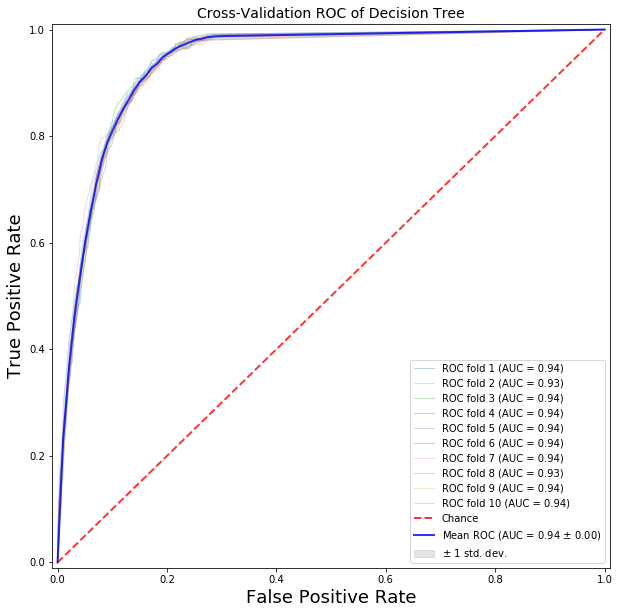

Start Time:  2020-04-22 10:56:42.544369 Stop Time:  2020-04-22 10:56:44.984863 Time Taken:  2.4410454999997455


In [61]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()
    
DT(df)

stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

__Plotting Decision Tree with saved parameters__

In [ ]:
def plotDT():
    bank_final = preprocess(df)
    X_train_res = bank_final.drop(['y'], axis = 1)
    y_train_res = bank_final['y']
    cv = KFold(n_splits=10, random_state=100, shuffle = True)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(10,10))
    i = 1
    for train, test in cv.split(X_train_res, y_train_res):
        probas_ = joblib.load('DT' + str(i),mmap_mode = 'c')
         # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train_res[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)     
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate',fontsize=18)
    plt.ylabel('True Positive Rate',fontsize=18)
    plt.title('Cross-Validation ROC of Decision Tree',fontsize=14)
    plt.legend(loc="lower right", prop={'size': 10})
    plt.show()


In [ ]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()
    
plotDT()

stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

__Naive Bayes__:
_with impution and shuffle_

__Precision, Recall, f1, Accuracy__

In [7]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()


X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = GaussianNB()
scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']

kfold = KFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_validate(model, X, Y, scoring=scoring, cv=kfold)
print("Recall: %0.2f (+/- %0.2f)" % (results_kfold['test_recall'].mean(), results_kfold['test_recall'].std()))
print("Precision: %0.2f (+/- %0.2f)" % (results_kfold['test_precision'].mean(), results_kfold['test_precision'].std()))
print("F1 Score: %0.2f (+/- %0.2f)" % (results_kfold['test_f1'].mean(), results_kfold['test_f1'].std()))
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold['test_accuracy'].mean(), results_kfold['test_accuracy'].std()))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (results_kfold['test_roc_auc'].mean(), results_kfold['test_roc_auc'].std()))

print(results_kfold)

print(model.priors)
stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

Recall: 0.61 (+/- 0.02)
Precision: 0.37 (+/- 0.02)
F1 Score: 0.46 (+/- 0.02)
Accuracy: 0.84 (+/- 0.01)
ROC_AUC: 0.86 (+/- 0.01)
{'fit_time': array([0.0418992 , 0.02792549, 0.03191376, 0.0274725 , 0.0279274 ,
       0.02995181, 0.02692676, 0.02792573, 0.03388524, 0.03889751]), 'score_time': array([0.01346827, 0.0129652 , 0.0129993 , 0.01296568, 0.01392555,
       0.0129652 , 0.03082204, 0.01296592, 0.01697946, 0.01695418]), 'test_accuracy': array([0.82592862, 0.83976693, 0.84340859, 0.84292304, 0.83515416,
       0.83806749, 0.83199806, 0.84316582, 0.83997086, 0.84458475]), 'test_recall': array([0.57419355, 0.57534247, 0.6263048 , 0.62054507, 0.61303462,
       0.61844864, 0.61358811, 0.5961945 , 0.60381862, 0.62666667]), 'test_precision': array([0.33969466, 0.34710744, 0.39164491, 0.38845144, 0.38101266,
       0.37820513, 0.36170213, 0.38263229, 0.33914209, 0.37400531]), 'test_f1': array([0.42685851, 0.43298969, 0.48192771, 0.47780468, 0.46994536,
       0.46937152, 0.45511811, 0.4661

In [24]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()


X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = GaussianNB(priors = [0.11, 0.89])
scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']

kfold = KFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_validate(model, X, Y, scoring=scoring, cv=kfold)
print("Recall: %0.2f (+/- %0.2f)" % (results_kfold['test_recall'].mean(), results_kfold['test_recall'].std()))
print("Precision: %0.2f (+/- %0.2f)" % (results_kfold['test_precision'].mean(), results_kfold['test_precision'].std()))
print("F1 Score: %0.2f (+/- %0.2f)" % (results_kfold['test_f1'].mean(), results_kfold['test_f1'].std()))
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold['test_accuracy'].mean(), results_kfold['test_accuracy'].std()))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (results_kfold['test_roc_auc'].mean(), results_kfold['test_roc_auc'].std()))

print(results_kfold)

print(model.priors)
stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

Recall: 0.83 (+/- 0.02)
Precision: 0.26 (+/- 0.01)
F1 Score: 0.40 (+/- 0.02)
Accuracy: 0.72 (+/- 0.01)
ROC_AUC: 0.86 (+/- 0.01)
{'fit_time': array([0.03689957, 0.03291368, 0.02792501, 0.02714896, 0.02799749,
       0.02699685, 0.02686596, 0.03000426, 0.02905273, 0.03044176]), 'score_time': array([0.01499391, 0.01299739, 0.01200271, 0.01242948, 0.01300931,
       0.01202345, 0.01203465, 0.01501274, 0.01394224, 0.01299977]), 'test_accuracy': array([0.70648216, 0.72371935, 0.72177713, 0.72881767, 0.71279437,
       0.7157077 , 0.7038116 , 0.72226269, 0.71345313, 0.73288004]), 'test_recall': array([0.8       , 0.81050228, 0.84968685, 0.83438155, 0.82688391,
       0.83438155, 0.80254777, 0.8435518 , 0.82338902, 0.84222222]), 'test_precision': array([0.25      , 0.25177305, 0.27481431, 0.27715877, 0.26994681,
       0.26711409, 0.25116279, 0.27161334, 0.23776706, 0.26917614]), 'test_f1': array([0.38095238, 0.38419913, 0.41530612, 0.41610037, 0.40701754,
       0.40467717, 0.38259109, 0.4109

__ROC__

In [30]:
def GNB(df):
    bank_final = preprocess(df)
    X_train_res = bank_final.drop(['y'], axis = 1)
    y_train_res = bank_final['y']

    cv = KFold(n_splits=10, random_state=100, shuffle = True)
    classifier = GaussianNB()
    
    cv_split_filenames = []

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(10,10))
    i = 1
    for train, test in cv.split(X_train_res, y_train_res):
        probas_ = classifier.fit(X_train_res.iloc[train], y_train_res.iloc[train]).predict_proba(X_train_res.iloc[test])
        
        cv_split_filenames = 'NB' + str(i)
        cv_split_filenames = os.path.abspath(cv_split_filenames)
        dump(probas_,cv_split_filenames)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train_res[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate',fontsize=18)
    plt.ylabel('True Positive Rate',fontsize=18)
    plt.title('Cross-Validation ROC of Naive Bayes',fontsize=14)
    plt.legend(loc="lower right", prop={'size': 10})
    return(plt.show())

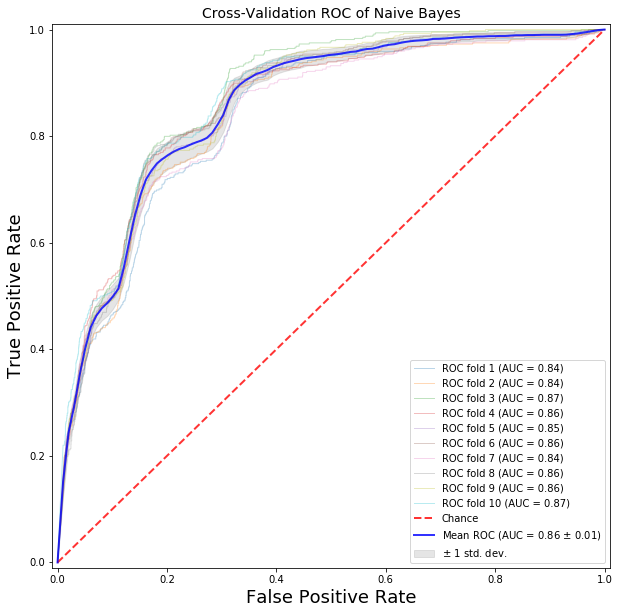

Start Time:  2020-04-20 19:24:11.474313 Stop Time:  2020-04-20 19:24:13.154473 Time Taken:  1.6801933999995526


In [31]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()
    
df = pd.read_csv('bank-data/bank-additional-full.csv')
GNB(df)
    
stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

__Plotting Naive Bayes with saved parameters__

In [ ]:
def plotGNB():
    bank_final = preprocess(df)
    X_train_res = bank_final.drop(['y'], axis = 1)
    y_train_res = bank_final['y']
    cv = KFold(n_splits=10, random_state=100, shuffle = True)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(10,10))
    i = 1
    for train, test in cv.split(X_train_res, y_train_res):
        probas_ = joblib.load('NB' + str(i),mmap_mode = 'c')
         # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train_res[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)     
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate',fontsize=18)
    plt.ylabel('True Positive Rate',fontsize=18)
    plt.title('Cross-Validation ROC of Naive Bayes',fontsize=14)
    plt.legend(loc="lower right", prop={'size': 10})
    plt.show()


In [ ]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()
    
plotGNB()
    
stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

__SVM:Linear Kernal__:
_with impution and shuffle_

__Precision, Recall, f1, Accuracy__

In [29]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()


X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = SVC(kernel='rbf', random_state=0)
scoring = ['accuracy', 'recall', 'precision', 'f1']

kfold = KFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_validate(model, X, Y, scoring=scoring, cv=kfold)
print("Recall: %0.2f (+/- %0.2f)" % (results_kfold['test_recall'].mean(), results_kfold['test_recall'].std()))
print("Precision: %0.2f (+/- %0.2f)" % (results_kfold['test_precision'].mean(), results_kfold['test_precision'].std()))
print("F1 Score: %0.2f (+/- %0.2f)" % (results_kfold['test_f1'].mean(), results_kfold['test_f1'].std()))
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold['test_accuracy'].mean(), results_kfold['test_accuracy'].std()))

stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

Recall: 0.22 (+/- 0.01)
Precision: 0.64 (+/- 0.04)
F1 Score: 0.32 (+/- 0.02)
Accuracy: 0.90 (+/- 0.00)
Start Time:  2020-04-21 12:41:19.014322 Stop Time:  2020-04-21 12:45:22.665108 Time Taken:  243.65058099999806


In [36]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()


X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = SVC(kernel = 'rbf', degree = 20, random_state = 0, class_weight = 'balanced')
scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
dump(model, 'svm.joblib')
    
kfold = KFold(n_splits=20, random_state=100, shuffle = True)
results_kfold = model_selection.cross_validate(model, X, Y, scoring=scoring, cv=kfold)
print("Recall: %0.2f (+/- %0.2f)" % (results_kfold['test_recall'].mean(), results_kfold['test_recall'].std()))
print("Precision: %0.2f (+/- %0.2f)" % (results_kfold['test_precision'].mean(), results_kfold['test_precision'].std()))
print("F1 Score: %0.2f (+/- %0.2f)" % (results_kfold['test_f1'].mean(), results_kfold['test_f1'].std()))
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold['test_accuracy'].mean(), results_kfold['test_accuracy'].std()))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (results_kfold['test_roc_auc'].mean(), results_kfold['test_roc_auc'].std()))

print(results_kfold)
stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

Recall: 0.85 (+/- 0.02)
Precision: 0.40 (+/- 0.02)
F1 Score: 0.55 (+/- 0.02)
Accuracy: 0.84 (+/- 0.01)
ROC_AUC: 0.92 (+/- 0.01)
{'fit_time': array([47.77260995, 57.78174806, 64.6970284 , 63.58998489, 64.36192322,
       65.33991122, 65.57796812, 64.4975419 , 50.03227758, 49.01994395,
       48.96415734, 49.76495409, 49.0498364 , 49.27425814, 50.20477295,
       48.5391767 , 49.80188513, 49.87166643, 49.07579422, 49.00391173]), 'score_time': array([2.27790523, 2.59785628, 2.38063836, 2.73269868, 2.73369551,
       2.58364129, 2.61700726, 2.60303903, 2.16018224, 2.25201607,
       2.20011854, 2.25499654, 2.14925385, 2.21906996, 2.22305965,
       2.176229  , 2.22505426, 2.18116784, 2.24001098, 2.14130449]), 'test_accuracy': array([0.83834951, 0.83834951, 0.84757282, 0.84757282, 0.84368932,
       0.85      , 0.85194175, 0.83834951, 0.82612919, 0.84458475,
       0.83729966, 0.84118504, 0.83098592, 0.84118504, 0.8489558 ,
       0.83244293, 0.83924235, 0.84215639, 0.85284119, 0.83341428])

In [35]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()


X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = SVC(kernel = 'poly', degree = 20, random_state = 0)
scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
dump(model, 'svm.joblib')
    
kfold = KFold(n_splits=20, random_state=100, shuffle = True)
results_kfold = model_selection.cross_validate(model, X, Y, scoring=scoring, cv=kfold)
print("Recall: %0.2f (+/- %0.2f)" % (results_kfold['test_recall'].mean(), results_kfold['test_recall'].std()))
print("Precision: %0.2f (+/- %0.2f)" % (results_kfold['test_precision'].mean(), results_kfold['test_precision'].std()))
print("F1 Score: %0.2f (+/- %0.2f)" % (results_kfold['test_f1'].mean(), results_kfold['test_f1'].std()))
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold['test_accuracy'].mean(), results_kfold['test_accuracy'].std()))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (results_kfold['test_roc_auc'].mean(), results_kfold['test_roc_auc'].std()))

print(results_kfold)
stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

Recall: 0.25 (+/- 0.02)
Precision: 0.64 (+/- 0.05)
F1 Score: 0.36 (+/- 0.02)
Accuracy: 0.90 (+/- 0.01)
ROC_AUC: 0.92 (+/- 0.01)
{'fit_time': array([17.62313414, 19.31630135, 16.34036851, 16.74955773, 16.1485908 ,
       15.40424848, 15.68603492, 16.69154763, 14.77751756, 15.12060261,
       16.48093581, 17.38050485, 16.78612471, 15.82081079, 15.39380169,
       15.48258066, 14.33866262, 15.75786996, 15.42273831, 16.09101915]), 'score_time': array([0.85770154, 0.87466073, 0.81285858, 0.79291153, 0.70312047,
       0.72006965, 0.85674357, 0.77389431, 0.81482768, 0.79883695,
       0.78393674, 0.77094078, 0.74600506, 0.764956  , 0.71112466,
       0.7220695 , 0.77396464, 0.73304534, 0.73403788, 0.73499393]), 'test_accuracy': array([0.89805825, 0.89708738, 0.90485437, 0.90145631, 0.8961165 ,
       0.90097087, 0.89466019, 0.89417476, 0.89800874, 0.89218067,
       0.90043711, 0.8970374 , 0.89752307, 0.89509471, 0.89460903,
       0.8970374 , 0.90383681, 0.9111219 , 0.90675085, 0.90869354])

__ROC__

In [ ]:
def SVMP(df):
    bank_final = preprocess(df)
    X_train_res = bank_final.drop(['y'], axis = 1)
    y_train_res = bank_final['y']

    cv = KFold(n_splits=10, random_state=100, shuffle = True)
    classifier = SVC(kernel='linear', probability=True,random_state=0)
    
    cv_split_filenames = []

    Accuracy = []
    Recall = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(10,10))
    i = 1
    for train, test in cv.split(X_train_res, y_train_res):
        probas_ = classifier.fit(X_train_res.iloc[train], y_train_res.iloc[train]).predict_proba(X_train_res.iloc[test])
        Accuracy.append(accuracy_score(y_train_res[test],probas_[:, 1]))
        Recall.append(recall_score(y_train_res[test],probas_[:, 1]))
        
        cv_split_filenames = 'SVMP' + str(i)
        cv_split_filenames = os.path.abspath(cv_split_filenames)
        dump(probas_,cv_split_filenames)
        #cv_split_filenames.append(cv_split_filenames)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train_res[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate',fontsize=18)
    plt.ylabel('True Positive Rate',fontsize=18)
    plt.title('Cross-Validation ROC of SVM:Polynomial Kernal',fontsize=14)
    plt.legend(loc="lower right", prop={'size': 10})
    return(plt.show())

In [ ]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()
    
df = pd.read_csv('bank-data/bank-additional-full.csv')
SVMP(df)

stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)

In [ ]:
def plotSVMP():
    bank_final = preprocess(df)
    X_train_res = bank_final.drop(['y'], axis = 1)
    y_train_res = bank_final['y']
    cv = KFold(n_splits=10, random_state=100, shuffle = True)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(10,10))
    i = 1
    for train, test in cv.split(X_train_res, y_train_res):
        probas_ = joblib.load('SVMP' + str(i),mmap_mode = 'c')
         # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train_res[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)     
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate',fontsize=18)
    plt.ylabel('True Positive Rate',fontsize=18)
    plt.title('Cross-Validation ROC of SVM:Polynomial Kernal',fontsize=14)
    plt.legend(loc="lower right", prop={'size': 10})
    plt.show()


__Plotting SVM:Polynomial Kernal with saved parameters__

In [ ]:
import timeit

start = timeit.default_timer()
from datetime import datetime

# current date and time
begin = datetime.now()
    
plotSVMP()
    
stop = timeit.default_timer()
end = datetime.now()
print('Start Time: ', begin,
      'Stop Time: ', end,
      'Time Taken: ', stop - start)